# INTRODUCTION TO IMPORTING DATA IN PYTHON

One of the core strengths of Python as a data science, engineering, and automation language is its extensive capability to **import and export data** from a wide range of sources. Whether working with flat files, files produced by other software, or relational databases, Python provides robust tools to read, process, and write data efficiently.


### Types of Data Sources

#### 1. Flat Files

- Text files (`.txt`)
- Comma-Separated Values (`.csv`)
- Tab-delimited files (`.tsv`)
- These are the most common formats for raw or exported data.

#### 2. Files from Other Software

- Excel files (`.xlsx`, `.xls`)
- SPSS, Stata, SAS
- Binary formats and data from statistical or business software

#### 3. Relational Databases

- SQL-based databases: SQLite, PostgreSQL, MySQL, etc.
- NoSQL and semi-structured sources (MongoDB, JSON, XML) can also be handled, but require different approaches.

### Reading Text Files in Python

The foundational tool for file I/O in Python is the built-in `open()` function, which provides an interface to interact with files in various modes:

- `'r'` – read (default)
- `'w'` – write (overwrites existing file)
- `'a'` – append (adds to end of file)
- `'b'` – binary (for non-text data)
- `'t'` – text (default, for strings)

#### Basic Pattern: Reading a Text File

```python
filename = 'data.txt'
file = open(filename, mode='r')  # Open file for reading
text = file.read()               # Read entire file contents as a single string
file.close()                     # Always close the file to free resources
```

##### Why Close the File?

- Closing the file releases system resources, flushes any buffered data, and avoids resource leaks.
- Failing to close files, especially in long-running programs or scripts processing many files, can lead to subtle bugs or performance issues.

### Writing to a Text File

Writing data follows the same `open()` pattern, with mode set to `'w'` (write):

```python
filename = 'output.txt'
file = open(filename, mode='w')  # Open file for writing (creates/overwrites)
file.write("Hello, world!\n")    # Write text to file
file.close()                     # Always close after writing
```

- Be aware that opening a file in write mode will erase its previous contents.

### The Pythonic Way: Context Managers with `with`

Using the `with` statement (context manager) is the **recommended, Pythonic approach** for file I/O. It ensures that the file is **automatically closed** when the block is exited, even if errors occur.

```python
with open('data.txt', 'r') as file:
    data = file.read()
    # The file is open inside this block

# Once outside, file is automatically closed
```

- Context managers improve reliability and code readability.
- Works for both reading and writing (`'r'`, `'w'`, `'a'`, etc.).

### Why These Techniques Matter

- Data rarely comes in a single, ready-to-use format. Mastering Python’s I/O enables seamless integration with diverse data sources and downstream workflows.
- Robust file handling practices (closing files, using context managers) prevent bugs, resource leaks, and data corruption.
- This foundational knowledge prepares you to work with higher-level libraries (such as `pandas`, `csv`, `json`, `openpyxl`, and `sqlalchemy`) for more sophisticated data import/export tasks.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import polars as pl
import seaborn as sns

In [182]:
# Open the file moby_dick.txt as read-only using a with statement and bind it to the variable file. Make sure to pass the filename enclosed in quotation marks ''.
with open("data/moby_dick.txt") as file:
    print(file.read())

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

In [183]:
# Use the / operator to join path components - this is the key feature
moby_path = Path("data") / "moby_dick.txt"
with open(moby_path, mode="r", encoding="utf-8") as file:
    print(file.read().strip())

CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If th

### Importing text files line by line
For large files, we may not want to print all of their content to the shell: you may wish to print only the first few lines. Enter the `.readline()` method, which allows you to do this. When a file called file is open, you can print out the first line by executing `file.readline()`. If you execute the same command again, the second line will print, and so on.

In the introductory video, Hugo also introduced the concept of a context manager. He showed that you can bind a variable file by using a context manager construct:

```python
with open('huck_finn.txt') as file:
```
While still within this construct, the variable file will be bound to open('huck_finn.txt'); thus, to print the file to the shell, all the code you need to execute is:
```python

with open('huck_finn.txt') as file:
    print(file.readline())
```

You'll now use these tools to print the first few lines of moby_dick.txt!

In [184]:
# Open moby_dick.txt using the with context manager and the variable file.
with open("data/moby_dick.txt") as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having



## The Importance of Flat Files in Data Science

### What Are Flat Files?

**Flat files** are the most fundamental and widely used format for storing and exchanging tabular data. They consist of plain text files in which each row represents a single record (observation) and each column represents a feature or attribute (field) of that record. Because of their simplicity and universal compatibility, flat files underpin the vast majority of data workflows, data exchanges, and archival systems in both research and industry.

### Key Concepts

- **Record**: A row in the file; each record is an individual observation or entry.
- **Field / Attribute**: A column; each field is a property, variable, or feature of the record.
- **Header Row**: Typically, the first row in the file specifies the names of each column, providing context for the data.
- **Delimiters**: Characters that separate fields within a record—commonly commas (`,`), tabs (`\t`), or semicolons (`;`).

### Common File Extensions and Formats

- `.csv` – **Comma-Separated Values** (most common): Each field is separated by a comma.
- `.txt` – **Plain Text**: Can be structured with various delimiters (commas, tabs, spaces).
- `.tsv` – **Tab-Separated Values**: Each field is separated by a tab character.

**Example CSV:**
```
name,age,score
Alice,23,88
Bob,21,93
```

**Example Tab-Delimited (.txt or .tsv):**
```
name    age    score
Alice   23     88
Bob     21     93
```

### Flat Files in Practice

#### Why Are Flat Files So Important in Data Science?

- **Universality**: Supported by virtually all software tools, programming languages, databases, and operating systems.
- **Human-Readable**: Easily inspected and edited with basic text editors.
- **Portable**: Easy to share, version, and archive.
- **Simplicity**: No embedded formulas, macros, or binary structures—just raw data.
- **Interoperability**: Used as the lingua franca for data exchange between disparate systems.

#### Data Science Scenarios

- **Data Acquisition**: Many open datasets (e.g., from Kaggle, UCI, government portals) are distributed as flat files.
- **Intermediate Processing**: Data pipelines often use CSV or TSV as staging or checkpoint formats.
- **Archival**: Flat files are ideal for long-term storage and future-proofing data against software obsolescence.

### Importing Flat Files in Python

Two primary packages dominate the import of flat files in the data science ecosystem:

- **NumPy**: Optimised for fast import of numeric tabular data into arrays (ideal for large, homogeneous datasets).
    - Functions like `numpy.loadtxt()` and `numpy.genfromtxt()` read in delimited text files.
- **pandas**: The de facto library for data manipulation, capable of importing flat files with both numeric and string data, handling headers, missing values, and various delimiters.
    - The `pandas.read_csv()` and `pandas.read_table()` functions are highly flexible and feature-rich.

#### Importing Examples

```python
import numpy as np
numeric_data = np.loadtxt('data.csv', delimiter=',')

import pandas as pd
df = pd.read_csv('data.csv')  # Handles headers and mixed data types by default
```

### Beyond the Basics: Limitations and Considerations

- **No Data Types**: All fields are read as text until parsed; you must specify or infer types post-import.
- **No Metadata**: Flat files lack embedded information about units, relationships, or formats.
- **Scalability**: Very large flat files can be unwieldy and require chunked or streamed processing.

In [185]:
# Assign filename to variable: file
file = "data/digits.csv"

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

<class 'numpy.ndarray'>


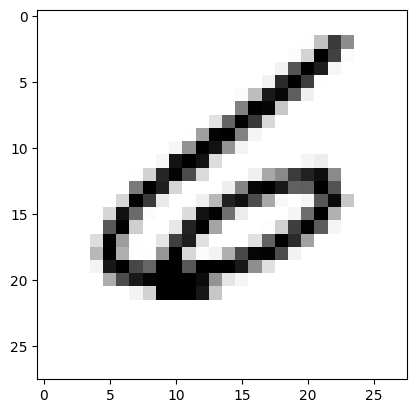

In [186]:
# Select and reshape a row
im = digits[21, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap="Greys", interpolation="nearest")
plt.show()

### Customizing your NumPy import
What if there are rows, such as a header, that you don't want to import? What if your file has a delimiter other than a comma? What if you only wish to import particular columns?

There are a number of arguments that `np.loadtxt()` takes that you'll find useful:

- delimiter changes the delimiter that `loadtxt()` is expecting.
    - You can use `','` for comma-delimited.
    - You can use `'\t'` for tab-delimited.
- `skiprows` allows you to specify how many rows (not indices) you wish to skip.
- `usecols` takes a list of the indices of the columns you wish to keep.
The file that you'll be importing, `digits_header.txt`, has a header and is tab-delimited.

In [187]:
# Assign the filename: file
file = "data/digits_header.txt"

# Load the data: data, delimiter, skiprows, usecols
data = np.loadtxt(file, delimiter="\t", skiprows=1, usecols=[0, 2])

#print(data)

### Importing different datatypes
The file `seaslug.txt`:
- has a text header, consisting of strings is tab-delimited.
- This data consists of the percentage of sea slug larvae that had metamorphosed in a given time period. 

Due to the header, if you tried to import it as-is using `np.loadtxt()`, Python would throw you a `ValueError` and tell you that it `could not convert string to float`. There are two ways to deal with this: firstly, you can set the data type argument `dtype` equal to `str` (for string).

Alternatively, you can skip the first row as we have seen before, using the `skiprows` argument.

In [188]:
seaslug = "data/seaslug.txt"

# Import file: data
data = np.loadtxt(seaslug, delimiter="\t", dtype=str)

# Print data
print(data[0])

['Time' 'Percent']


In [189]:
# Import file as floats and skip the first row: data_float
data_float = np.loadtxt(seaslug, delimiter="\t", dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

[0.    0.357]


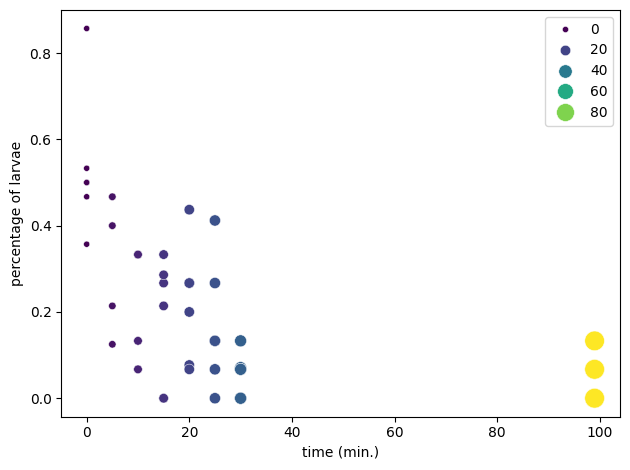

In [190]:
# Plot a scatterplot of the data with size and style based on time
fig, ax = plt.subplots()
sns.scatterplot(
    x=data_float[:, 0], y=data_float[:, 1], 
    palette="viridis", 
    hue=data_float[:, 0],
    size=data_float[:, 0],  # Size based on time values
    # style=data_float[:, 0],  # Style based on time values
    sizes=(20, 200)  # Control the range of sizes (min, max)
)
ax.set(xlabel="time (min.)", ylabel="percentage of larvae", title="")

plt.tight_layout()
plt.show()

### Using pandas to import flat files as DataFrames (1)
In the last exercise, you were able to import flat files containing columns with different datatypes as `numpy` arrays. However, the `DataFrame` object in pandas is a more appropriate structure in which to store such data and, thankfully, we can easily import files of mixed data types as `DataFrames` using the pandas functions `read_csv()` and `read_table()`.

In [191]:
titanic_pd = pd.read_csv("data/titanic_sub.csv")
titanic_pd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
titanic_pl = pl.read_csv("data/titanic_sub.csv")
titanic_pl.head()

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,f64,i64,i64,str,f64,str,str
1,0,3,"""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S"""
2,1,1,"""female""",38.0,1,0,"""PC 17599""",71.2833,"""C85""","""C"""
3,1,3,"""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


### Using pandas to import flat files as DataFrames (2)
In the last exercise, you were able to import flat files into a pandas `DataFrame`. As a bonus, it is then straightforward to retrieve the corresponding numpy array using the method `.to_numpy()`. You'll now have a chance to do this using the MNIST dataset, which is available as `digits.csv`.

There are a number of arguments that `pd.read_csv()` takes that you'll find useful for this exercise:

- `nrows` allows you to specify how many rows to read from the file. For example, `nrows=10` will only import the first 10 rows.
- `header` accepts row numbers to use as the column labels and marks the start of the data. If the file does not contain a header row, you can set `header=None`, and pandas will automatically assign integer column labels starting from 0 (e.g., 0, 1, 2, …).

In [193]:
digits_pd = pd.read_csv("data/digits.csv", nrows=5, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = digits_pd.to_numpy()

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


In [194]:
digits_pl = pl.read_csv("data/digits.csv", n_rows=5, has_header=False,)

# Build a numpy array from the DataFrame: data_array
data_array = digits_pl.to_numpy()

# Print the datatype of data_array to the shell
print(type(data_array))

<class 'numpy.ndarray'>


### Customizing your pandas import
The `pandas` package is great at dealing with many of the issues you will encounter when importing data as a data scientist, such as comments occurring in flat files, empty lines and missing values (`NA` or `NaN`). To wrap up this chapter, you're going to import a corrupted copy of the Titanic dataset `titanic_corrupt.txt`, which contains comments after the character `'#'`, and is tab-delimited.

Key arguments for `pd.read_csv()` include:

- `sep` sets the expected delimiter.
    - You can use `','` for comma-delimited.
    - You can use `'\t'` for tab-delimited.
- `comment` takes characters that comments occur after in the file, indicating that any text starting with these characters should be ignored.
- `na_values` takes a list of strings to identify as `NA`/`NaN`. By default, some values are already recognized as `NA`/`NaN`. Providing this argument will supply additional values.

In [195]:
titanic_corrupt_pd = pd.read_csv("data/titanic_corrupt.txt", sep="\t", comment="#", na_values=["Nothing"])
titanic_corrupt_pd.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,NaN,NaN,NaN
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.100,C123,S
4,5,0,3,male,35.0,0,0,373450,8.050,NaN,S


In [196]:
# Polars does not offer an equivalent to comment="#"
titanic_corrupt_pl = pl.read_csv("data/titanic_corrupt.txt", separator="\t", null_values=["Nothing"])
titanic_corrupt_pl.head()

PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
i64,i64,i64,str,f64,i64,i64,str,f64,str,str
1,0,3,"""male""",22.0,1,0,"""A/5 21171""",7.25,null,"""S #dfafdad"""
2,1,1,"""female""",38.0,1,0,"""PC 17599#to""",71.2833,"""C85""","""C"""
3,1,3,"""female""",26.0,0,0,"""STON/O2. 3101282""",7.925,null,"""S"""
4,1,1,"""female""",35.0,1,0,"""113803""",53.1,"""C123""","""S"""
5,0,3,"""male""",35.0,0,0,"""373450""",8.05,null,"""S"""


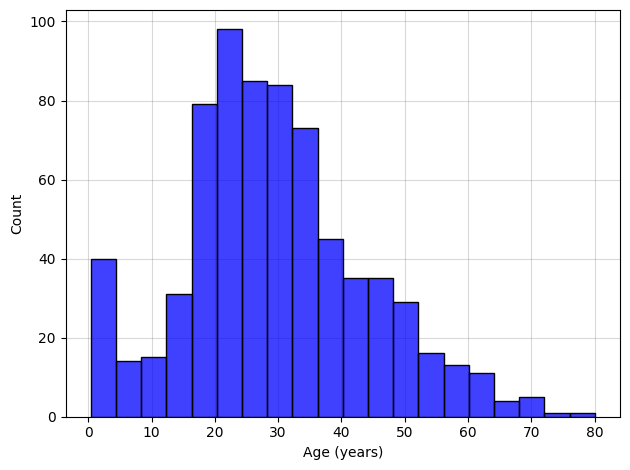

In [197]:
# Plot 'Age' variable in a histogram
fig, ax = plt.subplots()

# Create the histogram first
sns.histplot(data=titanic_corrupt_pl, x="Age", legend=False, color="blue", ax=ax)

ax.set_axisbelow(True)
ax.grid(True, alpha=0.3, color="gray")

ax.set(xlabel="Age (years)", ylabel="Count")

plt.tight_layout()
plt.show()

### Not so flat any more
You can explore your current working directory natively in Python using the library `os`, which consists of miscellaneous operating system interfaces.

The first line of the following code imports the library `os`, the second line stores the name of the current directory in a string called wd and the third outputs the contents of the directory in a list to the shell.
```python
import os
wd = os.getcwd()
os.listdir(wd)
```
Run this code in the shell and answer the following questions. Ignore the files that begin with `.`.



### Loading a pickled file
There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In this exercise, you'll import the `pickle package`, open a previously pickled data structure from a file and load it.

In [198]:
import pickle

# Save the dictionary as a pickle file
with open("data/data.pkl", "wb") as f:
    pickle.dump({"June": "69.4", "Aug": "85", "Airline": "8", "Mar": "84.4"}, f)

In [199]:
# Open pickle file and load data: d
with open("data/data.pkl", "rb") as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

{'June': '69.4', 'Aug': '85', 'Airline': '8', 'Mar': '84.4'}
<class 'dict'>


### Listing sheets in Excel files
Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use `pandas` to import Excel spreadsheets and how to list the names of the sheets in any loaded `.xlsx` file.

Recall from the video that, given an Excel file imported into a variable `spreadsheet`, you can retrieve a list of the sheet names using the attribute `spreadsheet.sheet_names`.

Specifically, you'll be loading and checking out the spreadsheet `'battledeath.xlsx'`, modified from the Peace Research Institute Oslo's (PRIO) dataset. This data contains age-adjusted mortality rates due to war in various countries over several years.

In [200]:
# Assign spreadsheet filename: file
excel_file = "data/battledeath.xlsx"

# Load spreadsheet: xls
xls = pd.ExcelFile(excel_file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


### Importing sheets from Excel files
In the previous exercises, you saw that the Excel file contains two sheets, `'2002'` and `'2004'`. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

The spreadsheet `'battledeath.xlsx'` is already loaded as `xls`.

In [201]:
df1 = xls.parse("2004")
df2 = xls.parse(0)

In [202]:
df1.head()

,War(country),2004
0,Afghanistan,9.451028
1,Albania,0.130354
2,Algeria,3.407277
3,Andorra,0.000000
4,Angola,2.597931


In [203]:
df2.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


### Customizing your spreadsheet import
Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet `'battledeath.xlsx'` is already loaded as `xls`.

As before, you'll use the method `parse()`. This time, however, you'll add the additional arguments `skiprows`, `names` and `usecols`. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate.

In [204]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=["Country", "AAM due to War (2002)"])

# Print the head of the DataFrame df1
df1.head()

,Country,AAM due to War (2002)
0,Albania,0.128908
1,Algeria,18.314120
2,Andorra,0.000000
3,Angola,18.964560
4,Antigua and Barbuda,0.000000


In [205]:
# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=["Country"])

# Print the head of the DataFrame df2
df2.head()

,Country
0,Albania
1,Algeria
2,Andorra
3,Angola
4,Antigua and Barbuda


### Importing SAS files

In [206]:
from sas7bdat import SAS7BDAT

# In the context of the file 'sales.sas7bdat', load its contents to a DataFrame df_sas, using the method .to_data_frame() on the object file.
with SAS7BDAT("data/sales.sas7bdat") as file:
    dfs_sas = file.to_data_frame()


# Print head of DataFrame
dfs_sas.head()

,YEAR,P,S
0,1950.0,12.9,181.899994
1,1951.0,11.9,245.000000
2,1952.0,10.7,250.199997
3,1953.0,11.3,265.899994
4,1954.0,11.2,248.500000


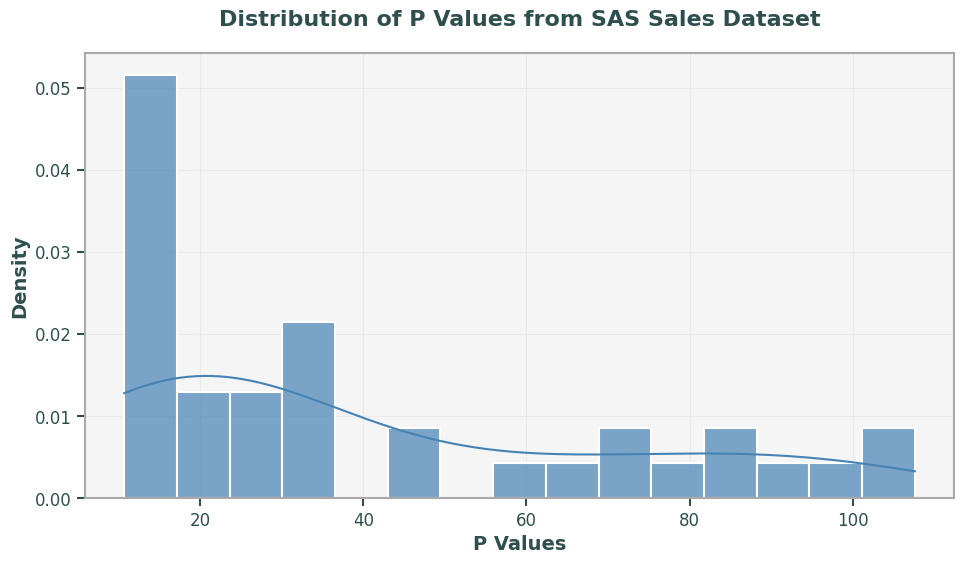

In [207]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(
    data=dfs_sas, 
    x="P",
    bins=15,  # Optimal number of bins for this dataset
    kde=True,  # Add kernel density estimation curve
    stat="density",  # Show density instead of count for better interpretation
    alpha=0.7,  # Semi-transparent bars for better visual appeal
    color="steelblue",  # Professional color choice
    edgecolor="white",  # White edges for better bar separation
    linewidth=1.5,  
    ax=ax,
)
# Customize grid appearance for better readability
ax.grid(True, alpha=0.3, color="lightgray", linestyle="-", linewidth=0.8)
ax.set_axisbelow(True)  

ax.set_xlabel("P Values", fontsize=14, fontweight="bold", color="darkslategray")
ax.set_ylabel("Density", fontsize=14, fontweight="bold", color="darkslategray")
ax.set_title("Distribution of P Values from SAS Sales Dataset", fontsize=16, fontweight="bold", color="darkslategray", pad=20)

# Customize tick parameters for better appearance
ax.tick_params(
    axis="both",  
    which="major",  
    labelsize=12,  
    colors="darkslategray",  
    direction="out",  
    length=6,  
    width=1.5  
)

# Add subtle background color and spine customization
ax.set_facecolor("whitesmoke")  
for spine in ax.spines.values():
    spine.set_edgecolor("darkgray")  
    spine.set_linewidth(1.5)  

# Improve overall layout and spacing
plt.tight_layout(pad=2.0)  
plt.show()

### Importing Stata files

In [208]:
# Load Stata file into a pandas DataFrame
disarea = pd.read_stata("data/disarea.dta")

# Print the head of the DataFrame df
disarea.head()

,wbcode,country,disa1,disa2,disa3,disa4,disa5,disa6,disa7,disa8,...,disa16,disa17,disa18,disa19,disa20,disa21,disa22,disa23,disa24,disa25
0,AFG,Afghanistan,0.00,0.00,0.76,0.73,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.02,0.00,0.00
1,AGO,Angola,0.32,0.02,0.56,0.00,0.0,0.00,0.56,0.0,...,0.0,0.4,0.0,0.61,0.00,0.0,0.99,0.98,0.61,0.00
2,ALB,Albania,0.00,0.00,0.02,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.16
3,ARE,United Arab Emirates,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00
4,ARG,Argentina,0.00,0.24,0.24,0.00,0.0,0.23,0.00,0.0,...,0.0,0.0,0.0,0.00,0.05,0.0,0.00,0.01,0.00,0.11


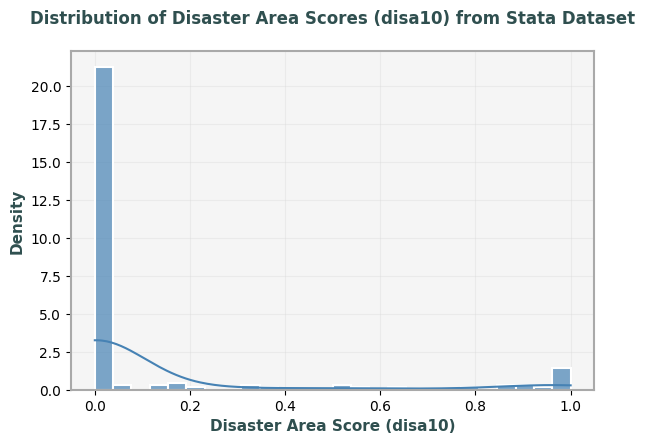

In [209]:
# Plot histogram of one column of the DataFrame
fig, ax = plt.subplots()

sns.histplot(data=disarea, x="disa10", 
             kde=True, stat="density", 
             alpha=0.7, color="steelblue", 
             edgecolor="white", linewidth=1.5)

ax.grid(True, alpha=0.3, color="lightgray", linestyle="-", linewidth=0.8)
ax.set_axisbelow(True)
ax.set_xlabel("Disaster Area Score (disa10)", fontsize=11, fontweight="bold", color="darkslategray")
ax.set_ylabel("Density", fontsize=11, fontweight="bold", color="darkslategray")
ax.set_title("Distribution of Disaster Area Scores (disa10) from Stata Dataset", 
             fontsize=12, fontweight="bold", color="darkslategray", pad=20,)

# Add subtle background color and spine customization
ax.set_facecolor("whitesmoke")  
for spine in ax.spines.values():
    spine.set_edgecolor("darkgray")  
    spine.set_linewidth(1.5)  

plt.tight_layout(pad=2.0)  

plt.show()

### Using h5py to import HDF5 files
The file `'LIGO_data.hdf5'` is already in your working directory. In this exercise, you'll import it using the `h5py` library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

In [210]:
import h5py
# Assign filename: file
ligo_file = "data/LIGO_data.hdf5"

# Load file: data
ligo_data = h5py.File(ligo_file, "r")

# Print the datatype of the loaded file
print(type(ligo_data))

<class 'h5py._hl.files.File'>


In [211]:
# Print the keys of the file
for key in ligo_data.keys():
    print(key)

meta
quality
strain


In [212]:
# Assign the HDF5 group data['strain'] to group.
group = ligo_data["strain"]

# Check out keys of group
for key in group.keys():
    print(key)

Strain


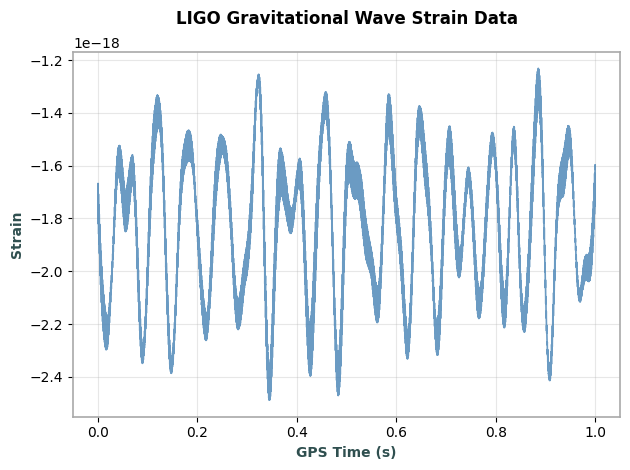

In [213]:
# Set variable equal to time series data: strain
strain = np.array(ligo_data["strain"]["Strain"])

# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data using matplotlib OOP approach with seaborn styling
fig, ax = plt.subplots()

# Use seaborn style but matplotlib OOP for plotting
ax.plot(time, strain[:num_samples], color='steelblue', linewidth=1.2, alpha=0.8)

# Customize the plot
ax.set_xlabel("GPS Time (s)", fontsize=10, fontweight="bold", color="darkslategray")
ax.set_ylabel("Strain", fontsize=10, fontweight="bold", color="darkslategray")
ax.set_title("LIGO Gravitational Wave Strain Data", fontsize=12, fontweight='bold', pad=20)

# Grid customization
ax.grid(True, alpha=0.3)
ax.set_axisbelow(True)

# Spine customization
for spine in ax.spines.values():
    spine.set_edgecolor('darkgray')
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.show()

### Loading .mat files
In this exercise, you'll figure out how to load a MATLAB file using `scipy.io.loadmat()` and you'll discover what Python datatype it yields.

In [214]:
# Import the package scipy.io.
import scipy.io

# Load the file 'albeck_gene_expression.mat' into the variable mat; do so using the function scipy.io.loadmat().
mat = scipy.io.loadmat("data/albeck_gene_expression.mat")

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


Use the method `.keys()` on the dictionary `mat` to print the keys. Most of these keys (in fact the ones that do NOT begin and end with '__') are variables from the corresponding MATLAB environment.


In [219]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])


In [216]:
# Print the keys of the MATLAB dictionary
print([key for key in mat.keys() if key.startswith("__") == False])

['rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt']


Print the type of the value corresponding to the key `'CYratioCyt'` in `mat`. Recall that `mat['CYratioCyt']` accesses the value.


In [226]:
# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat["CYratioCyt"]))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(mat["CYratioCyt"].shape)

<class 'numpy.ndarray'>
(200, 137)


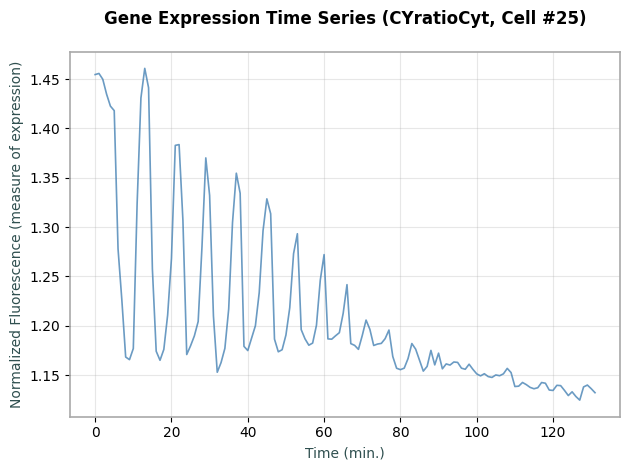

In [225]:
# Subset the array and plot it
mat_data_plot = mat["CYratioCyt"][25, 5:]

# Create figure and axis for plotting
fig, ax = plt.subplots()

# Plot the gene expression time series data
ax.plot(mat_data_plot, color="steelblue", linewidth=1.2, alpha=0.8)

# Set axis labels and title
ax.set_xlabel("Time (min.)", fontsize=10, color="darkslategray")
ax.set_ylabel("Normalized Fluorescence (measure of expression)", fontsize=10, color="darkslategray")
ax.set_title("Gene Expression Time Series (CYratioCyt, Cell #25)", fontsize=12, fontweight="bold", pad=20)

# Add grid and customize appearance
ax.grid(True, alpha=0.3)
ax.set_axisbelow(True)

# Customize spine appearance
for spine in ax.spines.values():
    spine.set_edgecolor("darkgray")
    spine.set_linewidth(1.2)

plt.tight_layout()
plt.show()

### Creating a database engine
Here, you're going to fire up your very first SQL engine. You'll create an engine to connect to the SQLite database `'Chinook.sqlite'`, which is in your working directory. Remember that to create an engine to connect to `'Northwind.sqlite'`, Hugo executed the command

`engine = create_engine('sqlite:///Northwind.sqlite')`
Here, `'sqlite:///Northwind.sqlite'` is called the connection string to the SQLite database `Northwind.sqlite`. A little bit of background on the **Chinook database**: the Chinook database contains information about a semi-fictional digital media store in which media data is real and customer, employee and sales data has been manually created.

Why the name Chinook, you ask? According to their website,

 _The name of this sample database was based on the Northwind database. Chinooks are winds in the interior West of North America, where the Canadian Prairies and Great Plains meet various mountain ranges. Chinooks are most prevalent over southern Alberta in Canada. Chinook is a good name choice for a database that intends to be an alternative to Northwind._

In [ ]:
# Import necessary module
from sqlalchemy import create_engine, inspect, text

# Create engine: engine
engine = create_engine("sqlite:///data/Chinook.sqlite")

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


### What are the tables in the database?
In this exercise, you'll once again create an engine to connect to `'Chinook.sqlite'`. Before you can get any data out of the database, however, you'll need to know what tables it contains!

To this end, you'll save the table names to a list using the method `.table_names()` on the engine and then you will print the list.

In [235]:
# Save the table names to a list: table_names
inspector = inspect(engine)
table_names = inspector.get_table_names()

# Print the table names to the shell
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


## Querying Relational Databases in Python

Interfacing with **relational databases** is a critical skill in data science, analytics, and software engineering. Databases efficiently store, organise, and query large structured datasets, often far exceeding what can be handled in memory. Python provides powerful, idiomatic tools for working with SQL databases—most notably, **SQLAlchemy** for connection and **pandas** for data wrangling.

### Basic SQL Queries

**SQL** (Structured Query Language) is the universal language for querying relational databases.

- `SELECT * FROM Table_Name`: Returns all columns of all rows from a table.
- Example: `SELECT * FROM Orders`

### Pythonic Workflow for SQL Querying

The canonical, robust workflow for querying SQL databases in Python is as follows:

1. **Import necessary packages**
2. **Create a database engine** (connection object)
3. **Establish a connection** to the database
4. **Execute SQL queries**
5. **Load query results into a pandas DataFrame** for analysis
6. **Close the connection** to free resources

### Querying a Database

#### Step 1: Import Packages and Create Engine

```python
from sqlalchemy import create_engine
import pandas as pd

# The connection string depends on the database and driver in use.
# Example for SQLite:
engine = create_engine('sqlite:///database_file.sqlite')
```

#### Step 2: Connect, Query, and Read Results

##### Classic Pattern

```python
con = engine.connect()
rs = con.execute("SELECT * FROM TableName")
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()  # Set column names from result set metadata
con.close()
```

##### Context Manager (Recommended, Pythonic)

Using the `with` statement ensures that the connection is properly closed even if errors occur, following best Python practices:

```python
with engine.connect() as con:
    rs = con.execute("SELECT column1, column2 FROM TableName")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()
# The connection is now closed
```

#### Step 3: Limiting Results

For exploratory analysis or debugging, it’s often useful to fetch only a subset of records:

```python
with engine.connect() as con:
    rs = con.execute("SELECT * FROM TableName")
    df = pd.DataFrame(rs.fetchmany(size=10))  # Only the first 10 records
    df.columns = rs.keys()
```

### Pythonic Patterns

- Always use a **context manager** (`with ... as ...:`) to guarantee resource cleanup.
- Always set `df.columns = rs.keys()` to ensure your DataFrame has the correct headers.
- For production code or repeated queries, use **parameterised SQL** to prevent SQL injection and improve maintainability.
- Use `pandas.read_sql_query()` for direct SQL-to-DataFrame workflows:
    ```python
    df = pd.read_sql_query("SELECT * FROM TableName", engine)
    ```
- Leverage the power of SQL for filtering, aggregation, and joins before loading data into pandas—this is much more efficient than filtering in Python after a full table import.

In [245]:
# Create engine: engine
engine = create_engine("sqlite:///data/Chinook.sqlite")

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute(text("SELECT * FROM Album"))

# Save results of the query to DataFrame: df
df_chin = pd.DataFrame(rs.fetchall())
df_chin.columns = rs.keys()

# Close connection
con.close()

# Print head of DataFrame df
df_chin.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [248]:
# Open engine in context manager
with engine.connect() as con:
    rs = con.execute(text("SELECT LastName, Title FROM Employee"))
    df_chin_with = pd.DataFrame(rs.fetchmany(3))
    df_chin_with.columns = ["LastName", "Title"]

# Print the length of the DataFrame df
print(len(df_chin_with))

3


In [249]:
# Print the head of the DataFrame df
display(df_chin_with.head())

,LastName,Title
0,Adams,General Manager
1,Edwards,Sales Manager
2,Peacock,Sales Support Agent


In [250]:
# Open engine in context manager
# Perform query and save results to DataFrame
with engine.connect() as con:
    rs = con.execute(text("SELECT * from Employee WHERE EmployeeID >= 6"))
    df_chin_with = pd.DataFrame(rs.fetchall())
    df_chin_with.columns = rs.keys()

# Print the head of the DataFrame 
display(df_chin_with)

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
1,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
2,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [251]:
# In the context manager, execute the query that selects all records from the Employee table and orders them in increasing order by the column BirthDate. Assign the result to rs.
with engine.connect() as con:
    rs = con.execute(text("SELECT * from Employee ORDER BY BirthDate"))
    df_chin_with = pd.DataFrame((rs.fetchall()))

    # Set the DataFrame's column names
    df_chin_with.columns = rs.keys()

# Print head of DataFrame
display(df_chin_with.head())

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


### Pandas and The Hello World of SQL Queries!
Here, you'll take advantage of the power of `pandas` to write the results of your SQL query to a DataFrame in one swift line of Python code!

You'll first import `pandas` and create the SQLite `'Chinook.sqlite'` engine. Then you'll query the database to select all records from the `Album` table.

Recall that to select all records from the `Orders` table in the Northwind database, Hugo executed the following command:

`df = pd.read_sql_query("SELECT * FROM Orders", engine)`

#### Pandas

In [ ]:
# Using the function create_engine(), create an engine for the SQLite database Chinook.sqlite and assign it to the variable engine.
engine = create_engine("sqlite:///data/Chinook.sqlite")

# Use the pandas function read_sql_query() to assign to the variable df the DataFrame of results from the following query: select all records from the table Album.
pd_chinook = pd.read_sql_query("SELECT * from Album", engine)

# Print head of DataFrame
display(pd_chinook.head())

# COMPARISON WITH CONTEXT MANAGER
# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute(text("SELECT * FROM Album"))
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(pd_chinook.equals(df1))

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


True


#### Polars

In [259]:
# Using the function create_engine(), create an engine for the SQLite database Chinook.sqlite and assign it to the variable engine.
engine = create_engine("sqlite:///data/Chinook.sqlite")

# Use the polars function read_database() to assign to the variable df the DataFrame of results from the following query: select all records from the table Album.
pl_chinook = pl.read_database("SELECT * from Album", engine)

# Print head of DataFrame
display(pl_chinook.head())

# COMPARISON WITH CONTEXT MANAGER
# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute(text("SELECT * FROM Album"))
    df1 = pl.DataFrame(rs.fetchall())
    df1.columns = list(rs.keys())

# Confirm that both methods yield the same result
print(pl_chinook.equals(df1))

AlbumId,Title,ArtistId
i64,str,i64
1,"""For Those About To Rock We Sal…",1
2,"""Balls to the Wall""",2
3,"""Restless and Wild""",2
4,"""Let There Be Rock""",1
5,"""Big Ones""",3


True


### Pandas for more complex querying
Here, you'll become more familiar with the pandas function `read_sql_query()` by using it to execute a more complex query: a `SELECT` statement followed by both a `WHERE` clause AND an `ORDER BY` clause.

You'll build a DataFrame that contains the rows of the `Employee` table for which the `EmployeeId` is greater than or equal to `6` and you'll order these entries by `BirthDate`.

In [ ]:
# Using the function create_engine(), create an engine for the SQLite database Chinook.sqlite and assign it to the variable engine.
engine = create_engine("sqlite:///data/Chinook.sqlite")

# Use the pandas to assign to the variable df the DataFrame of results from the following query: select all records from the Employee table where the EmployeeId is greater than or equal to 6 and ordered by BirthDate (make sure to use WHERE and ORDER BY in this precise order).
pd_chinook = pd.read_sql_query("SELECT * from Employee WHERE EmployeeID >= 6 ORDER BY BirthDate", engine)

# Print head of DataFrame
display(pd_chinook.head())

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,8,Callahan,Laura,IT Staff,6,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
1,7,King,Robert,IT Staff,6,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
2,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com


### The power of SQL lies in relationships between tables: INNER JOIN
Here, you'll perform your first `INNER JOIN`! You'll be working with your favourite SQLite database, `Chinook.sqlite`. For each record in the `Album` table, you'll extract the `Title` along with the `Name` of the `Artist`. The latter will come from the `Artist` table and so you will need to `INNER JOIN` these two tables on the `ArtistID` column of both.

Recall that to `INNER JOIN` the `Orders` and `Customers` tables from the Northwind database, Hugo executed the following SQL query:

`"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"`

The following code has already been executed to import the necessary packages and to create the engine:
```python
import pandas as pd
from sqlalchemy import create_engine
engine = create_engine('sqlite:///Chinook.sqlite')
```

Assign to `rs` the results from the following query: select all the records, extracting the `Title` of the record and `Name` of the artist of each record from the `Album` table and the `Artist` table, respectively. To do so, `INNER JOIN` these two tables on the `ArtistID` column of both.


### Pandas

In [ ]:
# Open engine in context manager
engine = create_engine("sqlite:///data/Chinook.sqlite")

with engine.connect() as con:
    rs = con.execute(text("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID"))
    pd_chinook = pd.DataFrame(rs.fetchall())
    pd_chinook.columns = rs.keys()

# Print head of DataFrame df
display(pd_chinook.head())

,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith


### Polars

In [ ]:
# Open engine in context manager
engine = create_engine("sqlite:///data/Chinook.sqlite")

with engine.connect() as con:
    rs = con.execute(text("SELECT Title, Name FROM Album INNER JOIN Artist on Album.ArtistID = Artist.ArtistID"))
    pl_chinook = pl.DataFrame(rs.fetchall())
    pl_chinook.columns = list(rs.keys())


# Print head of DataFrame df
display(pl_chinook.head())

Title,Name
str,str
"""For Those About To Rock We Sal…","""AC/DC"""
"""Balls to the Wall""","""Accept"""
"""Restless and Wild""","""Accept"""
"""Let There Be Rock""","""AC/DC"""
"""Big Ones""","""Aerosmith"""


Use the pandas function `read_sql_query()` to assign to the variable `df` the DataFrame of results from the following query: **select** _all_ records **from** `PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId` that satisfy the condition `Milliseconds < 250000`.



### Pandas

In [ ]:
engine = create_engine("sqlite:///data/Chinook.sqlite")

# Execute query and store records in DataFrame
pd_chinook = pd.read_sql_query("SELECT * FROM PlaylistTrack INNER JOIN Track USING(TrackId) WHERE Milliseconds < 250000", engine)

# Print head of DataFrame
display(pd_chinook.head())

,PlaylistId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,3390,One and the Same,271,2,23,None,217732,3559040,0.99
1,1,3392,Until We Fall,271,2,23,None,230758,3766605,0.99
2,1,3393,Original Fire,271,2,23,None,218916,3577821,0.99
3,1,3394,Broken City,271,2,23,None,228366,3728955,0.99
4,1,3395,Somedays,271,2,23,None,213831,3497176,0.99


### Polars

In [283]:
engine = create_engine("sqlite:///data/Chinook.sqlite")

# Execute query and store records in DataFrame
pl_chinook = pl.read_database("SELECT * FROM PlaylistTrack INNER JOIN Track USING(TrackId) WHERE Milliseconds < 250000", engine)

# Print head of DataFrame
display(pl_chinook.head())

PlaylistId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
i64,i64,str,i64,i64,i64,str,i64,i64,f64
1,3390,"""One and the Same""",271,2,23,null,217732,3559040,0.99
1,3392,"""Until We Fall""",271,2,23,null,230758,3766605,0.99
1,3393,"""Original Fire""",271,2,23,null,218916,3577821,0.99
1,3394,"""Broken City""",271,2,23,null,228366,3728955,0.99
1,3395,"""Somedays""",271,2,23,null,213831,3497176,0.99
